In [1]:
from google.colab import drive
drive.mount('/content/drive')
RESEARCH_WORK_PATH = "/content/drive/My Drive/Colab Notebooks/BachelorResearch/"

Mounted at /content/drive


In [2]:
import soundfile as sf
import librosa
import pathlib
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras 
import os
import cv2
model01 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/BachelorResearch/models/efficient_net_v2_vanilla_crop01', compile=False)
model02 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/BachelorResearch/models/efficient_net_v2_vanilla_crop02', compile=False)
model015 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/BachelorResearch/models/efficient_net_v2_vanilla_crop015', compile=False)

In [3]:
def min_max(x, axis=None): # do min_max normalization ?->https://atmarkit.itmedia.co.jp/ait/articles/2110/07/news027.html
    min = 0
    max = 154.28702 
    # max = 137.74599
    x = np.abs(x)
    result = (x-min)/(max-min)
    return result

def quality_prediction(audio_path): # return prediction value
  data, sr = librosa.load(audio_path) 
  broken_flag = False

  sum01 = np.zeros(4)
  sum02 = np.zeros(4)
  sum015 = np.zeros(4)
  for i in range(14):
    # Crop range
    start = i*2*sr
    stop  = (i*2 + 2)*sr

    # STFT
    n_fft=512
    hop_length=256
    try:
      stft = np.abs(librosa.stft(data[start:stop], n_fft=n_fft, hop_length=hop_length))
    except ValueError:
      broken_flag = True
      continue

    # Normalization
    stft = min_max(stft)

    # Data Transform
    input = cv2.cvtColor(stft,cv2.COLOR_GRAY2RGB)
    input = np.expand_dims(input, axis=0)

    # Get shapes
    shape01 = model01.input_shape  
    shape02 = model02.input_shape  
    shape015 = model015.input_shape  

    # Predict
    try:
      scores01 = model01.predict(input[:,:shape01[1],:,:])
      scores02 = model02.predict(input[:,:shape02[1],:,:])
      scores015 = model015.predict(input[:,:shape015[1],:,:])
    except ValueError:
      scores01 = np.zeros(4)
      scores015 = np.zeros(4)
      scores02 = np.zeros(4)
      broken_flag = True
      continue


    # Get sum
    sum01 = sum01 + scores01
    sum02 = sum02 + scores02
    sum015 = sum015 + scores015
  if broken_flag:
    print(pathlib.Path(audio_path).stem, "seems broken. len:", round(len(data)/sr,4) ,"sec")
  return sum01, sum015, sum02




def path_to_audiofiles(dir_folder):
    list_of_audio = []
    for file in os.listdir(dir_folder):
        if file.endswith(".wav"):
            directory = "%s%s" % (dir_folder, file)
            list_of_audio.append(directory)
    return list_of_audio

RESEARCH_WORK_PATH = "/content/drive/My Drive/Colab Notebooks/BachelorResearch/"
unknown = RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/renamed/unknown/"


In [5]:
# from tqdm import tqdm

data01 = np.zeros((4,4))
data02 = np.zeros((4,4))
data015 = np.zeros((4,4))

for audio in (path_to_audiofiles(unknown)):
  y = int(pathlib.Path(audio).stem[1])-1
  print("True: Q" +  str(y+1))
  p01, p015, p02 = quality_prediction(audio)
  p01 = np.argmax(p01)
  p02 = np.argmax(p02)
  p015 = np.argmax(p015)
  print("Pred01: Q" +  str(p01+1))
  print("Pred02: Q" +  str(p02+1))
  print("Pred015: Q" +  str(p015+1))
  data01[y][p01] += 1
  data02[y][p02] += 1
  data015[y][p015] += 1

True: Q1
Q1.MT0015005100 seems broken. len: 27.1412 sec
Pred01: Q1
Pred02: Q4
Pred015: Q1
True: Q1


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=512 is too small for input signal of length=0
  n_fft, y.shape[-1]


Q1.MT0013914319 seems broken. len: 10.08 sec
Pred01: Q3
Pred02: Q4
Pred015: Q3
True: Q1
Pred01: Q1
Pred02: Q1
Pred015: Q1
True: Q1
Pred01: Q1
Pred02: Q1
Pred015: Q1
True: Q1
Pred01: Q1
Pred02: Q1
Pred015: Q1
True: Q1
Pred01: Q1
Pred02: Q1
Pred015: Q2
True: Q1
Pred01: Q4
Pred02: Q1
Pred015: Q4
True: Q1
Pred01: Q1
Pred02: Q1
Pred015: Q1
True: Q1
Pred01: Q1
Pred02: Q1
Pred015: Q1
True: Q1
Pred01: Q1
Pred02: Q1
Pred015: Q1
True: Q1
Pred01: Q1
Pred02: Q1
Pred015: Q1
True: Q1
Q1.MT0014576739 seems broken. len: 27.144 sec
Pred01: Q1
Pred02: Q1
Pred015: Q1
True: Q1
Pred01: Q1
Pred02: Q1
Pred015: Q1
True: Q1
Pred01: Q1
Pred02: Q1
Pred015: Q1
True: Q1
Pred01: Q1
Pred02: Q1
Pred015: Q1
True: Q1
Pred01: Q1
Pred02: Q1
Pred015: Q1
True: Q1
Pred01: Q1
Pred02: Q1
Pred015: Q1
True: Q1
Pred01: Q1
Pred02: Q3
Pred015: Q1
True: Q1
Pred01: Q1
Pred02: Q4
Pred015: Q1
True: Q1
Pred01: Q1
Pred02: Q1
Pred015: Q1
True: Q1
Pred01: Q1
Pred02: Q4
Pred015: Q3
True: Q1
Pred01: Q1
Pred02: Q1
Pred015: Q1
True: Q1
Q1.MT0

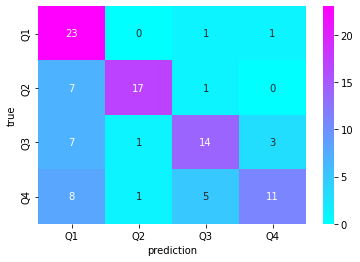

[[23.  0.  1.  1.]
 [ 7. 17.  1.  0.]
 [ 7.  1. 14.  3.]
 [ 8.  1.  5. 11.]]
[[92.  0.  4.  4.]
 [28. 68.  4.  0.]
 [28.  4. 56. 12.]
 [32.  4. 20. 44.]]


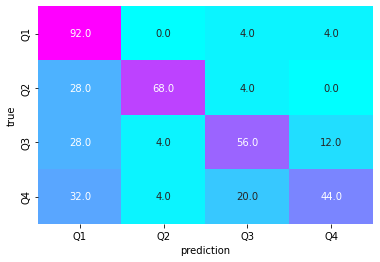

0.65


In [9]:
# what is this table ? -> https://atmarkit.itmedia.co.jp/ait/articles/2103/04/news023.html
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

combined_arr = data01
xl = ["Q1", "Q2", "Q3", "Q4"]
yl = xl


sns.heatmap(combined_arr, annot=True, fmt=".0f", xticklabels=xl, yticklabels=yl, cmap="cool")
plt.ylabel("true")
plt.xlabel("prediction")
plt.show()
print(combined_arr)
print(np.array(combined_arr)/combined_arr.sum(axis=1)*100)
sns.heatmap(np.array(combined_arr)/combined_arr.sum(axis=1)*100, annot=True, fmt=".1f", xticklabels=xl, yticklabels=yl, cmap="cool", cbar=False)
plt.ylabel("true")
plt.xlabel("prediction")
plt.show()
print(np.trace(combined_arr)/np.array(combined_arr).sum())

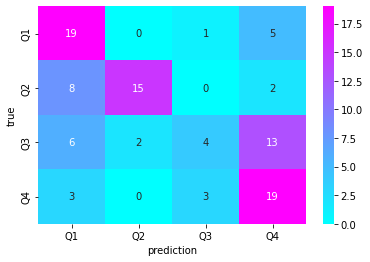

[[19.  0.  1.  5.]
 [ 8. 15.  0.  2.]
 [ 6.  2.  4. 13.]
 [ 3.  0.  3. 19.]]
[[76.  0.  4. 20.]
 [32. 60.  0.  8.]
 [24.  8. 16. 52.]
 [12.  0. 12. 76.]]


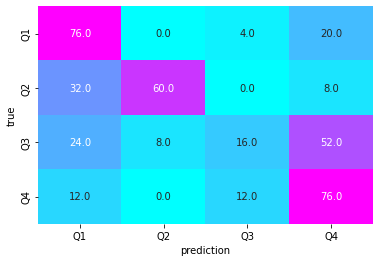

0.57


In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

combined_arr = data02
xl = ["Q1", "Q2", "Q3", "Q4"]
yl = xl


sns.heatmap(combined_arr, annot=True, fmt=".0f", xticklabels=xl, yticklabels=yl, cmap="cool")
plt.ylabel("true")
plt.xlabel("prediction")
plt.show()
print(combined_arr)
print(np.array(combined_arr)/combined_arr.sum(axis=1)*100)
sns.heatmap(np.array(combined_arr)/combined_arr.sum(axis=1)*100, annot=True, fmt=".1f", xticklabels=xl, yticklabels=yl, cmap="cool", cbar=False)
plt.ylabel("true")
plt.xlabel("prediction")
plt.show()
print(np.trace(combined_arr)/np.array(combined_arr).sum())

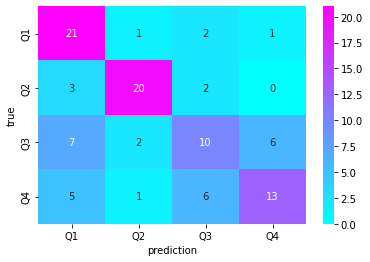

[[21.  1.  2.  1.]
 [ 3. 20.  2.  0.]
 [ 7.  2. 10.  6.]
 [ 5.  1.  6. 13.]]
[[84.  4.  8.  4.]
 [12. 80.  8.  0.]
 [28.  8. 40. 24.]
 [20.  4. 24. 52.]]


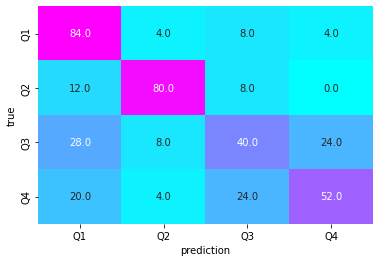

0.64


In [11]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

combined_arr = data015
xl = ["Q1", "Q2", "Q3", "Q4"]
yl = xl


sns.heatmap(combined_arr, annot=True, fmt=".0f", xticklabels=xl, yticklabels=yl, cmap="cool")
plt.ylabel("true")
plt.xlabel("prediction")
plt.show()
print(combined_arr)
print(np.array(combined_arr)/combined_arr.sum(axis=1)*100)
sns.heatmap(np.array(combined_arr)/combined_arr.sum(axis=1)*100, annot=True, fmt=".1f", xticklabels=xl, yticklabels=yl, cmap="cool", cbar=False)
plt.ylabel("true")
plt.xlabel("prediction")
plt.show()
print(np.trace(combined_arr)/np.array(combined_arr).sum())